# Tasks Description

Laboratory 5 covers the analytical signal, envelope, instantaneous phase/frequency, and phase-shift estimation. The tasks below follow the required workflow and notation.

---

## Exercise 1 — Analytical Signal & Hilbert Transform

### Task 1.1 — Properties of the Analytical Signal
Create a sinusoid y(t) with \(f=30 Hz), f_s=1000 Hz, length N=1000.  
Compute the analytical signal y_a(t) = hilbert(y).

- Plot magnitude of the spectrum.
- Plot the real and the imaginary part of signal in time subdomain.
- Read the time shift dt between real and imaginary parts and convert it to phase:
$$
  \Delta\phi = 360^\circ \cdot \frac{dt}{T}.
$$
  

### Task 1.2 — Custom Hilbert (FFT Method)
Implement Hilbert via FFT and compare with `scipy.signal.hilbert`:

1. Compute Y=FFT(y).
2. Zero the **negative** frequencies; keep DC and Nyquist as in standard analytic-signal construction.
3. Inverse FFT and multiply by 2 to obtain y_a.
Show the real and the imaginary part of signal in time subdomain  
  
---
  
## Exercise 2 — Envelope & Instantaneous Frequency (Chirp)

Generate a linear chirp \(y(t)=\mathrm{chirp}(t, F_0 \!\to\! F_1)\) with:
- N=2000, f_s=2000 Hz,
- F_0=5 Hz, F_1=200 Hz,
- apply a Hann window.

### Task 2.1 — Envelope & Instantaneous Frequency
From \(y_a(t)=A(t)e^{j\theta(t)}\):

- Envelope:
$$
  A(t) = |y_a(t)| = \sqrt{y^2(t)+y_h^2(t)}.
$$
- Phase (unwrap) and instantaneous frequency:
$$
  f_{\text{inst}}(t)=\frac{1}{2\pi}\frac{d\theta(t)}{dt}
  \;\approx\;
  \frac{\Delta\theta(t)}{2\pi}\,f_s.
$$

Plot y(t) with A(t) and f_inst(t); compare the sweep with the designed chirp.  
  
### Task 2.2 — Robustness to Noise
Add white noise with sigma=[0.01, 0.1, 0.2]. Re-estimate A(t) and f_inst(t).  
  
---
  
## Exercise 3 — Phase Shift Estimation

### Task 3.1 — Constant Phase Shift (−60°)
Create y_2 shifted by −60°:

- **Method A:** `chirp(..., phi=-60)` (degrees).
- **Method B:** analytic rotation:
$$
  y_2(t)=\Re\{\,y_a(t)\,e^{j\phi}\,\},\quad \phi=-60^\circ \ (\text{use radians in code}).
$$

Estimate the phase difference using
$$
\Delta\phi
= -\arg\!\left(\sum_t
\frac{y_a(t)\,\overline{y_{2a}(t)}}{|y_{2a}(t)|^2}\right),
$$
where y_a and y_2a are analytic signals of y and y_2. Compare both methods.  
  
### Task 3.2 — Time-Varying Phase Shift
Create y_3 by multiplying the analytic signal by 
$$
e^{-j2\pi t}
$$
and taking the real part:
$$
y_3(t)=\Re\{\,y_a(t)\,e^{-j2\pi t}\,\}.
$$

- Compute the **average** phase shift with the previous estimator.
- Then estimate the **time-varying** phase:
$$
  \phi(t)
  = \arg\!\left(
  \frac{y_a(t)\,\overline{y_{3a}(t)}}{|y_{3a}(t)|^2}
  \right),
$$
unwrap(phi(t)) and compare with the imposed law phi_orig(t)=2 * pi * t. 
  
---  
  
## Exercise 4 — Envelope in dB & Damping Estimate

For a 1-DOF model with coefficients:
- m1 = 1
- c1 = 100
- k1 = 1e6

The dumper coefficient was calculated from the dependence 
$$
y(t)=A\,e^{-\lambda t}\cos(\omega t-\phi),\qquad
\tau=\frac{1}{\lambda}=\frac{1}{\zeta\,\omega},
$$
the **logarithm of the envelope** is linear in time.

1) Compute the envelope \(A(t)=|y_a(t)|\) and its dB scale (e.g., 0 dB at the peak):
$$
A_{\mathrm{dB}}(t) = 20\log_{10}(A(t)).
$$

2) Fit a straight line to A_dB(t); read tau from the -8.7 dB drop (i.e., e^{-1}).  
<center>
<img src="image1.png"/>  
</center>  
  
3) Compute zeta using
$$
\tau=\dfrac{1}{\zeta\,\omega_n}\ 
$$
and compare with the theoretical zeta.

Include plots: envelope, log-envelope (dB), fitted line, plus numerical values of tau and zeta.

## Create signal function

In [159]:
from typing import Union, Tuple
import numpy as np

def create_signal(signal, sign_freq: Union[int, float], sign_amplitude: Union[int, float], sign_length: int, sampling_freq: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    Creates the signal with specified parameters.
    
    Args:
        signal: The signal that will be created.
        sign_freq Union[int, float]: Frequency of the signal.
        sign_amplitude Union[int, float]: Amplitude of the signal.
        sign_length int: Number of samples.
        sampling_freq int: Sampling frequency.

    Return:
        Tuple[np.ndarray, np.ndarray]: (Time vector, Signal values vector)
    '''
    
    # Signal length
    Ns = sign_length
    # Sampling frequency
    fs = sampling_freq
    # Sampling period
    dt = 1 / fs
    # Time vector
    t = np.arange(0, Ns) * dt

    return t, sign_amplitude * signal(2 * np.pi * sign_freq * t)

## Plotting Lines

In [160]:
import matplotlib.pyplot as plt

def plot_lines(x_points, y_points, line):
    if line == 'vertical':
        plt.vlines(x_points[0], y_points[0], y_points[1])
        plt.vlines(x_points[1], y_points[0], y_points[1])
        
        plt.annotate('',
                     xy=(x_points[1], y_points[1]),
                     xytext=(x_points[0] + 0.06, y_points[1]),
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))
        plt.text(x_points[1] + 0.005, y_points[1] + 0.03, f'Time shift: {(x_points[0] - x_points[1]):.5f}s')

    else:
        plt.hlines(y_points[0], x_points[0], x_points[1])
        plt.hlines(y_points[1], x_points[0], x_points[1])

        y_middle = (y_points[0] + y_points[1]) / 2
        plt.annotate('', xy=(x_points[1], y_points[0]), xytext=(x_points[1], y_points[1]),
                     arrowprops=dict(facecolor='black', arrowstyle='<->', lw=1.5))
        plt.text(x_points[1] - 0.00001, y_middle, f'2x Amplitude: {abs(y_points[1] - y_points[0]):.5f}', rotation=90, va='center')

## Exercise 1.1

### Sinus -> 100 Samples, 100 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude

In [161]:
A_sign = 1
f_sign = 30
len_sign = 1000
f_sample = 2000

t, y_sin = create_signal(
    signal=np.sin,
    sign_freq=f_sign,
    sign_amplitude=A_sign,
    sign_length=len_sign,
    sampling_freq=f_sample
)
y_sin.shape

(1000,)

### Hilbert Transform

In [162]:
from scipy.signal import hilbert

ya = hilbert(y_sin)

### Spectrum of Analytical Signal

In [163]:
N = len(ya)
Ya_fft = abs(np.fft.fft(ya) / N) * 2
df = f_sample / N
fv = np.arange(0, N) * df

half = N // 2
Ya_pos = Ya_fft[:half]
fv_pos = fv[:half]


### Plotting absolute value of analytical signal, real and imaginary parts in the time domain

phase shift: -91.8 degrees


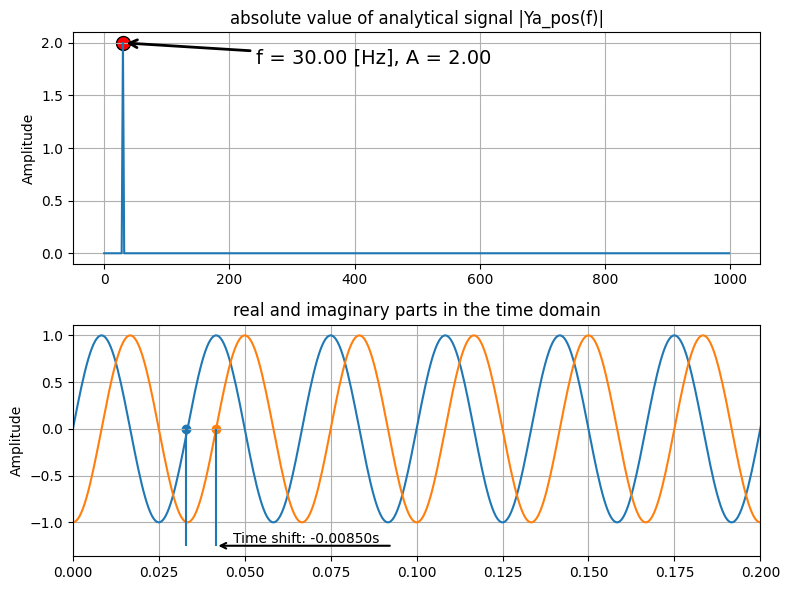

In [164]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fig, axis = plt.subplots(ncols=1, nrows=2, figsize=(8,6))

peak, _ = find_peaks(Ya_pos, height=0.05)

axis[0].plot(fv_pos, Ya_pos)
axis[0].scatter(fv[peak], Ya_pos[peak], color='red', s=100, edgecolors='black', label="Detected Peaks")
f = fv_pos[peak][0]
A = Ya_pos[peak][0]
axis[0].annotate(f"f = {f:.2f} [Hz], A = {A:.2f}",
            xy=(fv_pos[peak] + 1, Ya_pos[peak]),  # Start point of the arrow
            xytext=(fv_pos[peak] + 400, Ya_pos[peak] - 0.2),  # End point of the arrow
            arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
            fontsize=14,
            ha='center')
axis[0].set_title('absolute value of analytical signal |Ya_pos(f)|')
axis[0].set_ylabel("Amplitude")
axis[0].grid(True)

ya_real_zero_mask = np.where((ya.real[:-1] < 0) & (ya.real[1:] >= 0))[0]    # Input signal crosses zero
ya_real_zero_mask = ya_real_zero_mask[10 < ya_real_zero_mask]

ya_imag_zero_mask = np.where((ya.imag[:-1] < 0) & (ya.imag[1:] >= 0))[0]            # Output signal crosses zero
ya_imag_zero_mask = ya_imag_zero_mask[20 < ya_imag_zero_mask]

t_ya_real_zero = t[ya_real_zero_mask[0]]
t_ya_imag_zero = t[ya_imag_zero_mask[0]]


axis[1].plot(t, ya.real)
axis[1].plot(t, ya.imag)
axis[1].scatter(t_ya_real_zero, 0)
axis[1].scatter(t_ya_imag_zero, 0)
plot_lines([t_ya_real_zero, t_ya_imag_zero], [0, -1.25], line='vertical')
axis[1].set_xlim(0, 0.2)
axis[1].set_title('real and imaginary parts in the time domain')
axis[1].set_ylabel("Amplitude")
axis[1].grid(True)

plt.tight_layout()

T_sin = 1 / f_sign
dt_shift = t_ya_real_zero - t_ya_imag_zero
phase_shift = 360 * (dt_shift / T_sin)

print(f'phase shift: {phase_shift} degrees')

## Exercise 1.2

### Hilbert from Scratch

In [165]:
def hilbert_transform(y: np.array):
    Y_fft = np.fft.fft(y)
    
    N = len(Y_fft)
    Y_fft[N // 2:] = 0
    Y_ifft = np.fft.ifft(Y_fft) * 2

    return Y_ifft

In [166]:
t, y_sin_test = create_signal(
    signal=np.sin,
    sign_freq=f_sign,
    sign_amplitude=A_sign,
    sign_length=len_sign,
    sampling_freq=f_sample
)
y_sin_test.shape

(1000,)

### Hilbert Transform (Hilbert from Scratch)

In [167]:
yh_test = hilbert_transform(y_sin_test)

### Spectrum of Analytical Signal (Hilbert from Scratch)

In [168]:
N = len(yh_test)
Ya_fft = abs(np.fft.fft(yh_test) / N) * 2
df = f_sample / N
fv = np.arange(0, N) * df

half = N // 2
Ya_pos = Ya_fft[:half]
fv_pos = fv[:half]

### Plotting absolute value of analytical signal, real and imaginary parts in the time domain (Hilbert from Scratch)

phase shift: -91.8 degrees


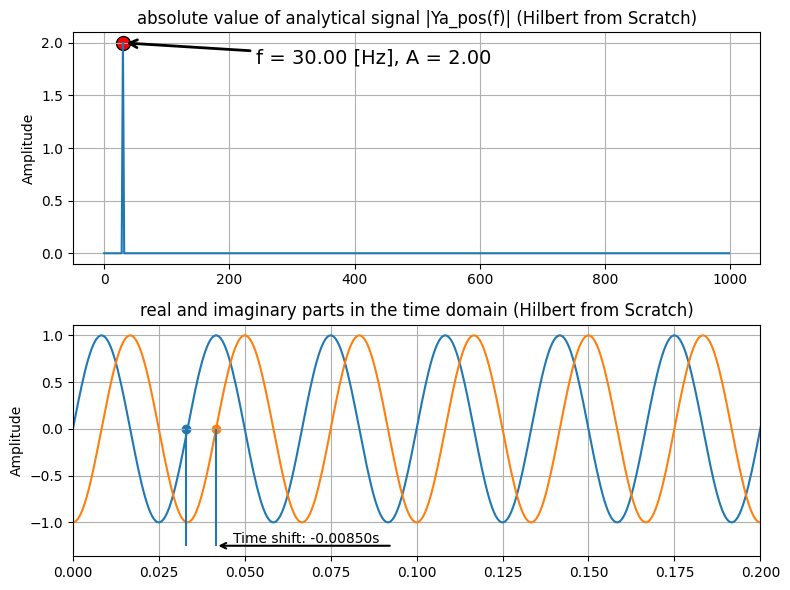

In [169]:
fig, axis = plt.subplots(ncols=1, nrows=2, figsize=(8,6))

peak, _ = find_peaks(Ya_pos, height=0.05)

axis[0].plot(fv_pos, Ya_pos)
axis[0].scatter(fv[peak], Ya_pos[peak], color='red', s=100, edgecolors='black', label="Detected Peaks")
f = fv_pos[peak][0]
A = Ya_pos[peak][0]
axis[0].annotate(f"f = {f:.2f} [Hz], A = {A:.2f}",
            xy=(fv_pos[peak] + 1, Ya_pos[peak]),  # Start point of the arrow
            xytext=(fv_pos[peak] + 400, Ya_pos[peak] - 0.2),  # End point of the arrow
            arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
            fontsize=14,
            ha='center')
axis[0].set_title('absolute value of analytical signal |Ya_pos(f)| (Hilbert from Scratch)')
axis[0].set_ylabel("Amplitude")
axis[0].grid(True)

ya_real_zero_mask = np.where((yh_test.real[:-1] < 0) & (yh_test.real[1:] >= 0))[0]    # Input signal crosses zero
ya_real_zero_mask = ya_real_zero_mask[10 < ya_real_zero_mask]

ya_imag_zero_mask = np.where((yh_test.imag[:-1] < 0) & (yh_test.imag[1:] >= 0))[0]            # Output signal crosses zero
ya_imag_zero_mask = ya_imag_zero_mask[20 < ya_imag_zero_mask]

t_ya_real_zero = t[ya_real_zero_mask[0]]
t_ya_imag_zero = t[ya_imag_zero_mask[0]]


axis[1].plot(t, yh_test.real)
axis[1].plot(t, yh_test.imag)
axis[1].scatter(t_ya_real_zero, 0)
axis[1].scatter(t_ya_imag_zero, 0)
plot_lines([t_ya_real_zero, t_ya_imag_zero], [0, -1.25], line='vertical')
axis[1].set_xlim(0, 0.2)
axis[1].set_title('real and imaginary parts in the time domain (Hilbert from Scratch)')
axis[1].set_ylabel("Amplitude")
axis[1].grid(True)

plt.tight_layout()

T_sin = 1 / f_sign
dt_shift = t_ya_real_zero - t_ya_imag_zero
phase_shift = 360 * (dt_shift / T_sin)

print(f'phase shift: {phase_shift} degrees')

## Exercise 2.1

### Chirp and Hanning Window

`yp` as a chirp with initial frequency `f1 = 5 Hz` and final frequency `f2 = 200 Hz` and multiplied by Hanning window

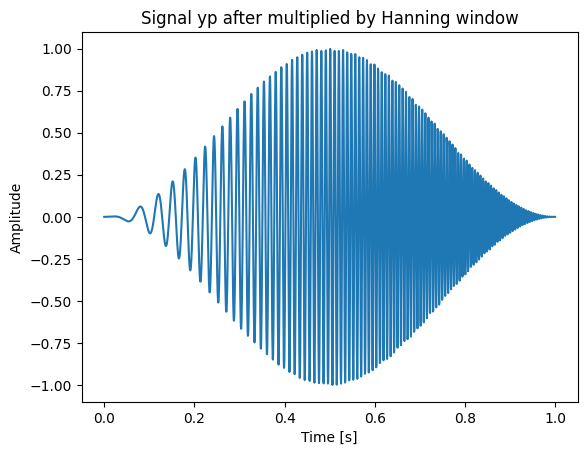

In [170]:
from scipy.signal import chirp

Ns_p = 2000                           # Samples (Length)                        
fs_p = 2000                           # Sampling frequency
f1_p = 5                              # Initial frequency
f2_p = 200                            # Final frequency
dt_p = 1 / fs_p                       # Time period 
t_p = np.arange(Ns_p) * dt_p          # Time vecotr

yp = chirp(t_p, f1_p, t_p[-1], f2_p)  # Chirp Signal

hann_window = np.hanning(yp.shape[0])  # Hanning window with the length of yp
yp = yp * hann_window

plt.plot(t_p, yp)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')

plt.title('Signal yp after multiplied by Hanning window')

plt.show()


### Envelope and Instantaneous Phase

In [171]:
ya = hilbert(yp)
amplitude_envelope = np.abs(ya)
instantaneous_phase = np.unwrap(np.angle(ya))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs_p

### Plotting Envelope and Instantaneous Phase

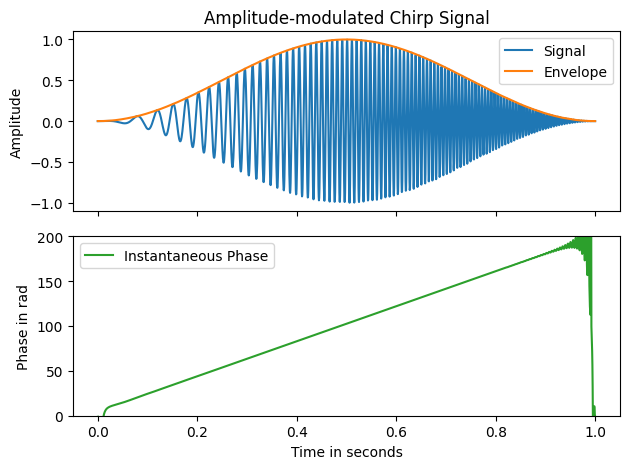

In [172]:
fig, axis = plt.subplots(nrows=2, sharex='all', tight_layout=True)

axis[0].set_title('Amplitude-modulated Chirp Signal')
axis[0].set_ylabel('Amplitude')
axis[0].plot(t_p, yp, label='Signal')
axis[0].plot(t_p, amplitude_envelope, label='Envelope')
axis[0].legend()

axis[1].plot(t_p[1:], instantaneous_frequency, 'C2-', label='Instantaneous Phase')
axis[1].set_ylim(0, 200)
axis[1].set_xlabel('Time in seconds')
axis[1].set_ylabel('Phase in rad')
axis[1].legend()

plt.show()

### Add noise to the previous Chirp Signal

In [173]:
std_list = [0.01, 0.1, 0.2]
noises_list = [std*np.random.randn(len(yp)) for std in std_list]

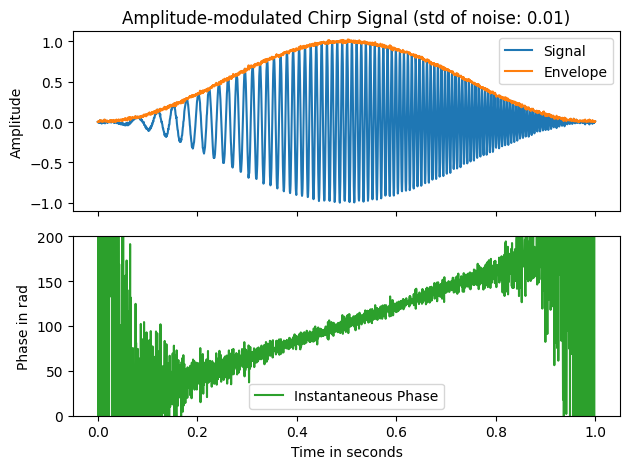

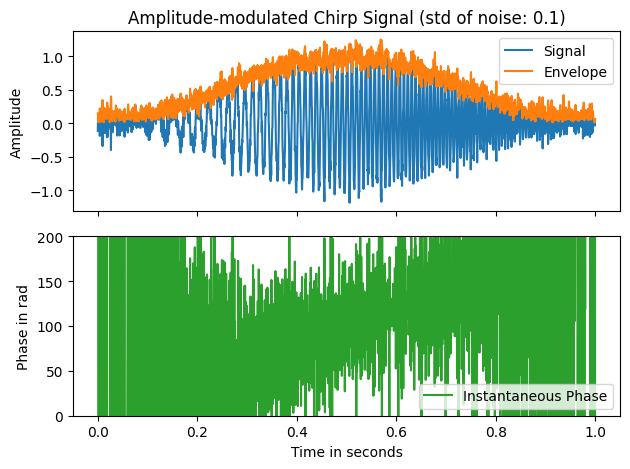

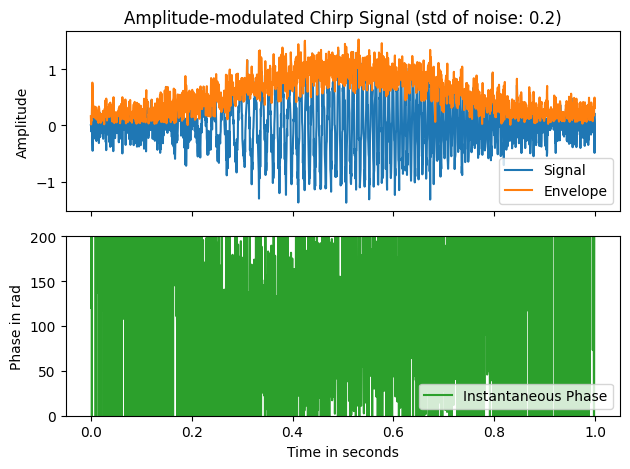

In [174]:
for noise, std in zip(noises_list, std_list):
    yp_noise = yp + noise
    ya = hilbert(yp_noise)
    amplitude_envelope = np.abs(ya)
    instantaneous_phase = np.unwrap(np.angle(ya))
    instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs_p

    fig, axis = plt.subplots(nrows=2, sharex='all', tight_layout=True)

    axis[0].set_title(f'Amplitude-modulated Chirp Signal (std of noise: {std})')
    axis[0].set_ylabel('Amplitude')
    axis[0].plot(t_p, yp_noise, label='Signal')
    axis[0].plot(t_p, amplitude_envelope, label='Envelope')
    axis[0].legend()

    axis[1].plot(t_p[1:], instantaneous_frequency, 'C2-', label='Instantaneous Phase')
    axis[1].set_ylim(0, 200)
    axis[1].set_xlabel('Time in seconds')
    axis[1].set_ylabel('Phase in rad')
    axis[1].legend()

    plt.show()

## Exercise 3.1

### Chirp signal with phase shift

In [175]:
Ns_p = 2000                           # Samples (Length)                        
fs_p = 2000                           # Sampling frequency
f1_p = 5                              # Initial frequency
f2_p = 200                            # Final frequency
dt_p = 1 / fs_p                       # Time period 
t_p = np.arange(Ns_p) * dt_p          # Time vecotr
phi = -60

yp2 = chirp(t_p, f1_p, t_p[-1], f2_p, phi=phi)  # Chirp Signal

hann_window = np.hanning(yp2.shape[0])  # Hanning window with the length of yp
yp2 = yp2 * hann_window

### Chirp signal from the previous exercise with phase shift applied manually
$$
y_{a,\phi}(t) = y_a(t)\, e^{j\phi}
$$

In [176]:
Ns_p = 2000                           # Samples (Length)                        
fs_p = 2000                           # Sampling frequency
f1_p = 5                              # Initial frequency
f2_p = 200                            # Final frequency
dt_p = 1 / fs_p                       # Time period 
t_p = np.arange(Ns_p) * dt_p          # Time vecotr

yp = chirp(t_p, f1_p, t_p[-1], f2_p)  # Chirp Signal

hann_window = np.hanning(yp.shape[0])  # Hanning window with the length of yp
yp = yp * hann_window

phi_rad = np.deg2rad(phi)

ya = hilbert(yp)
yp_analytic = ya * np.exp(1j*phi_rad)
yp_shift = yp_analytic.real

### Comparison of two methods

#### Average Phase Shift between original chirp and chirp with specified phase shift
$$
\Delta\phi \;=\; -\arg\!\left(\sum_{t} \frac{ y_a(t)\,\overline{y_{2a}(t)} }{ \lvert y_{2a}(t)\rvert^2 + \varepsilon }\right)
$$
where:
- y_a - analytical signal of the original signal
- y2a - analytical signal of the yp2 signal

In [177]:
ya = hilbert(yp)
yp2_a = hilbert(yp2)

eps = 1e-12
phi_est_rad = -np.angle(np.sum( (ya * np.conj(yp2_a)) / (np.abs(yp2_a) ** 2 + eps) ))
phi_est_deg = (np.rad2deg(phi_est_rad) + 180) % 360 - 180

print(f"Estimated phase shift = {phi_est_deg:.2f} deg (expected {phi:.2f} deg)")

Estimated phase shift = -60.88 deg (expected -60.00 deg)


#### Average Phase Shift between original chirp and chirp with manually applied phase shift

In [178]:
ya = hilbert(yp)
yp_shift_a = hilbert(yp_shift)

eps = 1e-12
phi_est_rad = -np.angle(np.sum( (ya * np.conj(yp_shift_a)) / (np.abs(yp_shift_a) ** 2 + eps) ))
phi_est_deg = (np.rad2deg(phi_est_rad) + 180) % 360 - 180

print(f"Estimated phase shift = {phi_est_deg:.2f} deg (expected {phi:.2f} deg)")

Estimated phase shift = -60.17 deg (expected -60.00 deg)


### Plotting results of both methods

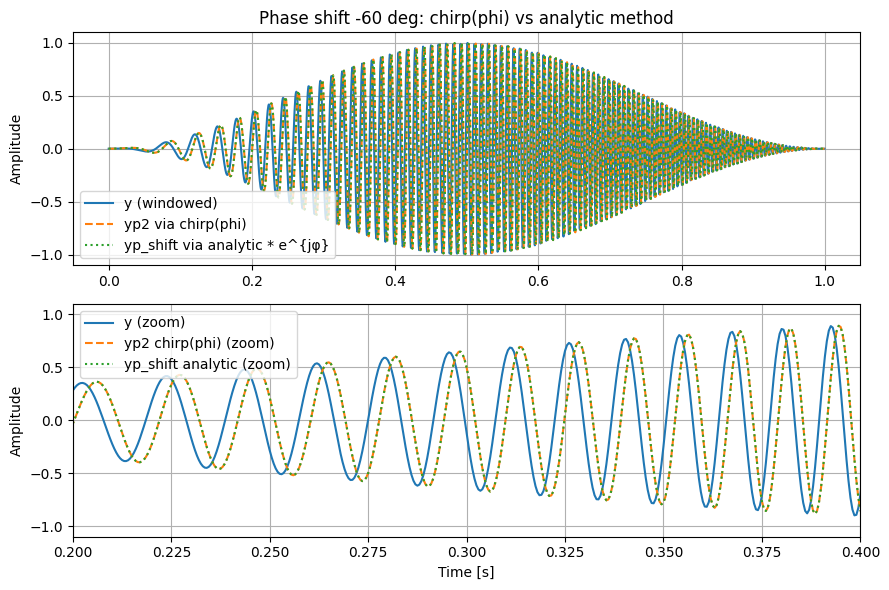

In [179]:
fig, ax = plt.subplots(2, 1, figsize=(9,6))
ax[0].plot(t_p, yp, label='y (windowed)')
ax[0].plot(t_p, yp2, '--', label='yp2 via chirp(phi)')
ax[0].plot(t_p, yp_shift, ':', label='yp_shift via analytic * e^{jφ}')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Phase shift -60 deg: chirp(phi) vs analytic method')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_p, yp, label='y (zoom)')
ax[1].plot(t_p, yp2, '--', label='yp2 chirp(phi) (zoom)')
ax[1].plot(t_p, yp_shift, ':', label='yp_shift analytic (zoom)')
ax[1].set_xlim([0.2, 0.4])
ax[1].set_xlabel('Time [s]'); ax[1].set_ylabel('Amplitude')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

## Exercise 3.2

### Time-varying phase shift
$$
y_{a}(t) = y_a(t)\, e^{-j2\pi t}
$$

In [180]:
Ns_p = 2000                           # Samples (Length)                        
fs_p = 2000                           # Sampling frequency
f1_p = 5                              # Initial frequency
f2_p = 200                            # Final frequency
dt_p = 1 / fs_p                       # Time period 
t_p = np.arange(Ns_p) * dt_p          # Time vecotr

yp = chirp(t_p, f1_p, t_p[-1], f2_p)  # Chirp Signal
phi_orig_rad = 2.0 * np.pi * t_p

hann_window = np.hanning(yp.shape[0])  # Hanning window with the length of yp
yp = yp * hann_window

ya = hilbert(yp)
y3_analytic = ya * np.exp(-1j * 2.0 * np.pi * t_p)
y3_shift = y3_analytic.real

#### Average Phase Shift between original chirp and chirp with time-carying phase shift using provided formula
$$
\Delta\phi \;=\; -\arg\!\left(\sum_{t} \frac{ y_a(t)\,\overline{y_{3a}(t)} }{ \lvert y_{3a}(t)\rvert^2 + \varepsilon }\right)
$$

In [181]:
ya = hilbert(yp)
yp3_a = hilbert(y3_shift)

eps = 1e-12
phi_est_rad = -np.angle(np.sum( (ya * np.conj(yp3_a)) / (np.abs(yp3_a) ** 2 + eps) ))
phi_est_deg = (np.rad2deg(phi_est_rad))

phi_orig_rad_unw = np.unwrap(phi_orig_rad)
phi_orig_avg_rad = np.mean(phi_orig_rad_unw)
phi_orig_avg_deg = (np.rad2deg(phi_orig_avg_rad))

print(f"Estimated average d phi = {phi_est_deg:.2f} deg")
print(f"True average d phi = {phi_orig_avg_deg:.2f} deg")

Estimated average d phi = -39.31 deg
True average d phi = 179.91 deg


#### Average Phase Shift between original chirp and chirp with time-carying phase shift using modified formula
$$
\Delta\phi \;=\; \arg\!\left(\frac{ y_a(t)\,\overline{y_{3a}(t)} }{ \lvert y_{3a}(t)\rvert^2 + \varepsilon }\right)
$$

In [182]:
ya = hilbert(yp)
yp3_a = hilbert(y3_shift)

eps = 1e-12
phi_est_rad_mod = np.angle( (ya * np.conj(yp3_a)) / (np.abs(yp3_a) ** 2 + eps) )
phi_est_rad_mod_unw = np.unwrap(phi_est_rad_mod)
phi_est_rad_mod_mean = np.mean(phi_est_rad_mod_unw)
phi_est_deg_mod = np.rad2deg(phi_est_rad_mod_mean)

print(f"Estimated phase shift = {phi_est_deg_mod:.2f}")

Estimated phase shift = 179.95


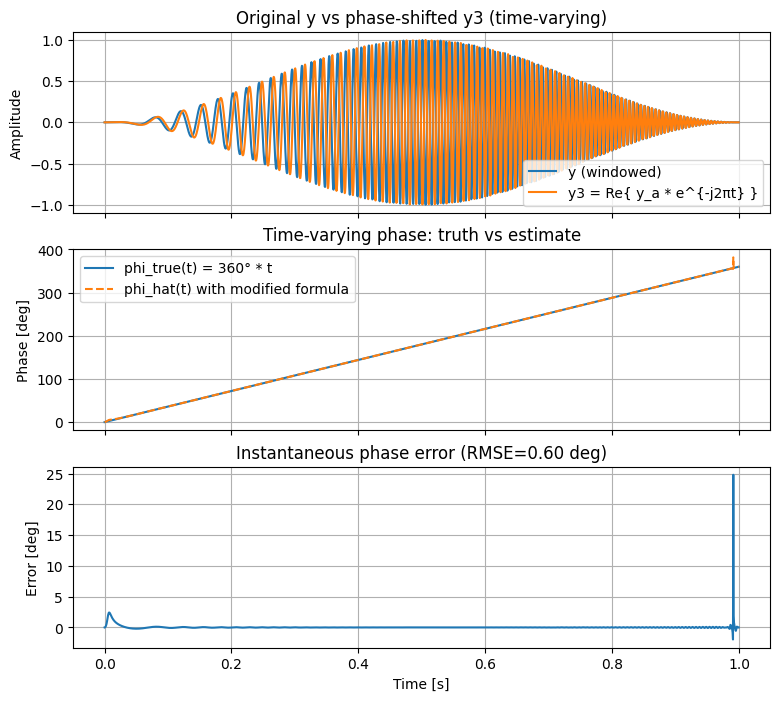

In [183]:
fig, ax = plt.subplots(3, 1, figsize=(9, 8), sharex=True)

# Convert to degrees for plotting
phi_t_hat_deg_mod = np.rad2deg(phi_est_rad_mod_unw)
phi_true_deg  = np.rad2deg(phi_orig_rad_unw)

ax[0].plot(t_p, yp, label='y (windowed)')
ax[0].plot(t_p, y3_shift, label='y3 = Re{ y_a * e^{-j2πt} }')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Original y vs phase-shifted y3 (time-varying)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_p, phi_true_deg, label='phi_true(t) = 360° * t')
ax[1].plot(t_p, phi_t_hat_deg_mod, '--', label='phi_hat(t) with modified formula')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_title('Time-varying phase: truth vs estimate')
ax[1].grid(True)
ax[1].legend()

# show the estimation error
err_deg = (phi_t_hat_deg_mod - phi_true_deg)
ax[2].plot(t_p, err_deg)
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Error [deg]')
ax[2].set_title(f'Instantaneous phase error (RMSE={np.sqrt(np.mean(err_deg**2)):.2f} deg)')
ax[2].grid(True)

## Exercise 4 Estimation of damping using an envelope

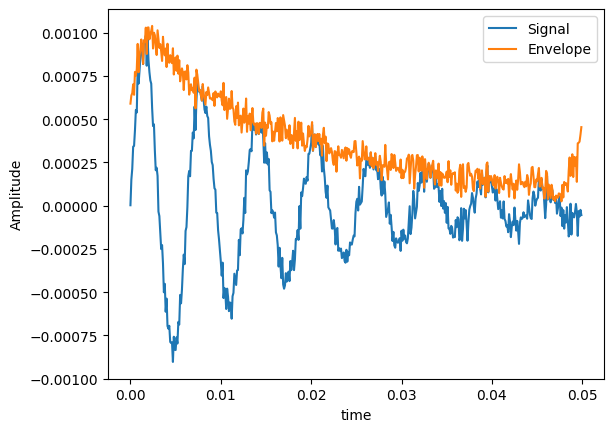

In [184]:
import control as ctrl

# Model Params
m1 = 1
c1 = 100
k1 = 1e6
wsp_tlumienia = c1/(2*np.sqrt(k1*m1))

# Frequency of Own Vibrations of the System
fc = np.sqrt(k1/m1)/2/np.pi

# Transmitation of System
sys = ctrl.TransferFunction(1, [m1, c1, k1])
fs = 1e4
t = np.arange(0, 0.05, 1/fs)
s = len(t)

# Impulse Signal Response
T, y = ctrl.impulse_response(sys, T=t)
y = y.squeeze() + 5e-5*np.random.randn(s)

# Envelope
ya = hilbert(y)
envelope = np.abs(ya)

plt.plot(t, y, label='Signal')
plt.plot(t, envelope, label='Envelope')
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.legend()

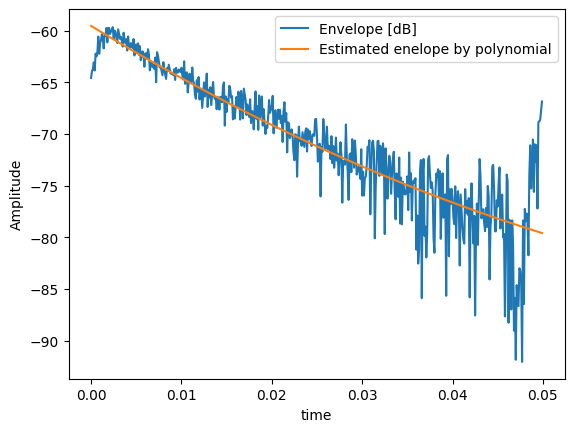

In [185]:
from numpy.polynomial import Chebyshev

# Logarithm of Envelope scaled to dB
envelope_db = 20 * np.log10(envelope)

cheb = Chebyshev.fit(t, envelope_db, 2)
env_fit = cheb(t)

plt.plot(t, envelope_db, label='Envelope [dB]')
plt.plot(t, env_fit, label='Estimated enelope by polynomial')
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.legend()

### Estimation of damping using an envelope

In [186]:
import matplotlib.pyplot as plt

def plot_lines(x_points, y_points, line):
    if line == 'vertical':
        y = y_points[1]-5
        plt.vlines(x_points[0], y_points[0], y)
        plt.vlines(x_points[1], y_points[1], y)
        
        plt.annotate('',
                     xy=(x_points[0], y),
                     xytext=(x_points[1], y),
                     arrowprops=dict(facecolor='black', arrowstyle='<->', lw=1.5))
        plt.text(x_points[0] + (x_points[1] - x_points[0]) / 3, y + 1, rf'$\tau$ = {x_points[1] - x_points[0]}', va='center')

    else:
        x = x_points[1] + 0.005
        plt.hlines(y_points[0], x_points[0], x)
        plt.hlines(y_points[1], x_points[1], x)

        y_middle = (y_points[0] + y_points[1]) / 2
        plt.annotate('', xy=(x, y_points[0]), xytext=(x, y_points[1]),
                     arrowprops=dict(facecolor='black', arrowstyle='<->', lw=1.5))
        plt.text(x - 0.0015, y_middle, '-8,7 dB', rotation=90, va='center')

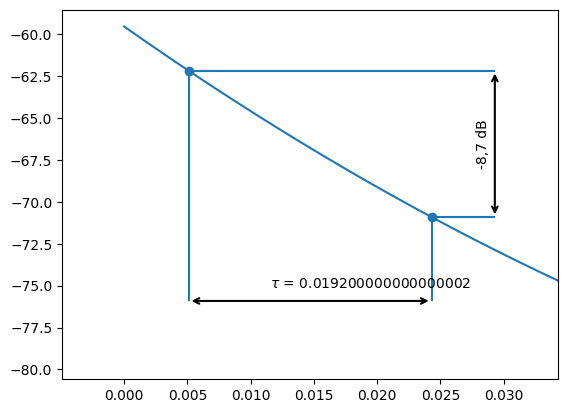

In [187]:
t_mask = t > 0.005

p1 = env_fit[t_mask][0]
p2 = p1 - 8.7
env_mask = env_fit < p2

t1 = t[t_mask][0]
p1 = p1
t2 = t[env_mask][0]
p2 = env_fit[env_mask][0]

plt.plot(t, env_fit, label='Estimated enelope by polynomial')
plt.scatter([t1, t2], [p1, p2])
plot_lines([t1, t2], [p1, p2], line='vertical')
plot_lines([t1, t2], [p1, p2], line='horizontal')
plt.xlim([t1 - 0.01, t2 + 0.01])

plt.show()

In [188]:
omega = 2 * np.pi * fc
tal = t2 - t1

dumper_coef = 1 / (tal * omega)
dumper_coef

np.float64(0.05208333333333333)